In [ ]:
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

In [2]:
import scanpy as sc 
import sys 
sys.path.append('../../src')

from spaceoracle.prophets import Prophet

2024-12-02 14:06:19.440073: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
adata_train = sc.read_h5ad(
    '/ix/djishnu/shared/djishnu_kor11/training_data/slideseq_spleen.h5ad')

pythia = Prophet(
    adata=adata_train,
    models_dir='/ix/djishnu/shared/djishnu_kor11/models_spleen',
    annot='clusters',
    annot_labels='Cell_Type'
)

In [4]:
pythia.compute_betas()

100%|██████████| 2627/2627 [02:41<00:00, 16.30it/s]


In [16]:
[x for x in pythia.adata.var_names if 'Cxc' in x]

['Cxcl10', 'Cxcl9', 'Cxcl12', 'Cxcl13', 'Cxcr2']

In [17]:
[x for x in pythia.adata.var_names if 'Ccr' in x]

['Ccr9', 'Ccr3']

In [18]:
[x for x in pythia.adata.var_names if 'Ccl' in x]

['Ccl5', 'Ccl25', 'Ccl24']

In [19]:
[x for x in pythia.adata.var_names if 'Tnf' in x]

['Tnfrsf11a', 'Tnfsf10', 'Tnfsf8']

In [35]:
# https://www.nature.com/articles/s41598-018-26693-x

goi = 'Cxcr2'
goi in pythia.adata.var_names

True

In [ ]:
pythia.perturb(target=goi, n_propagation=3, gene_expr=0)

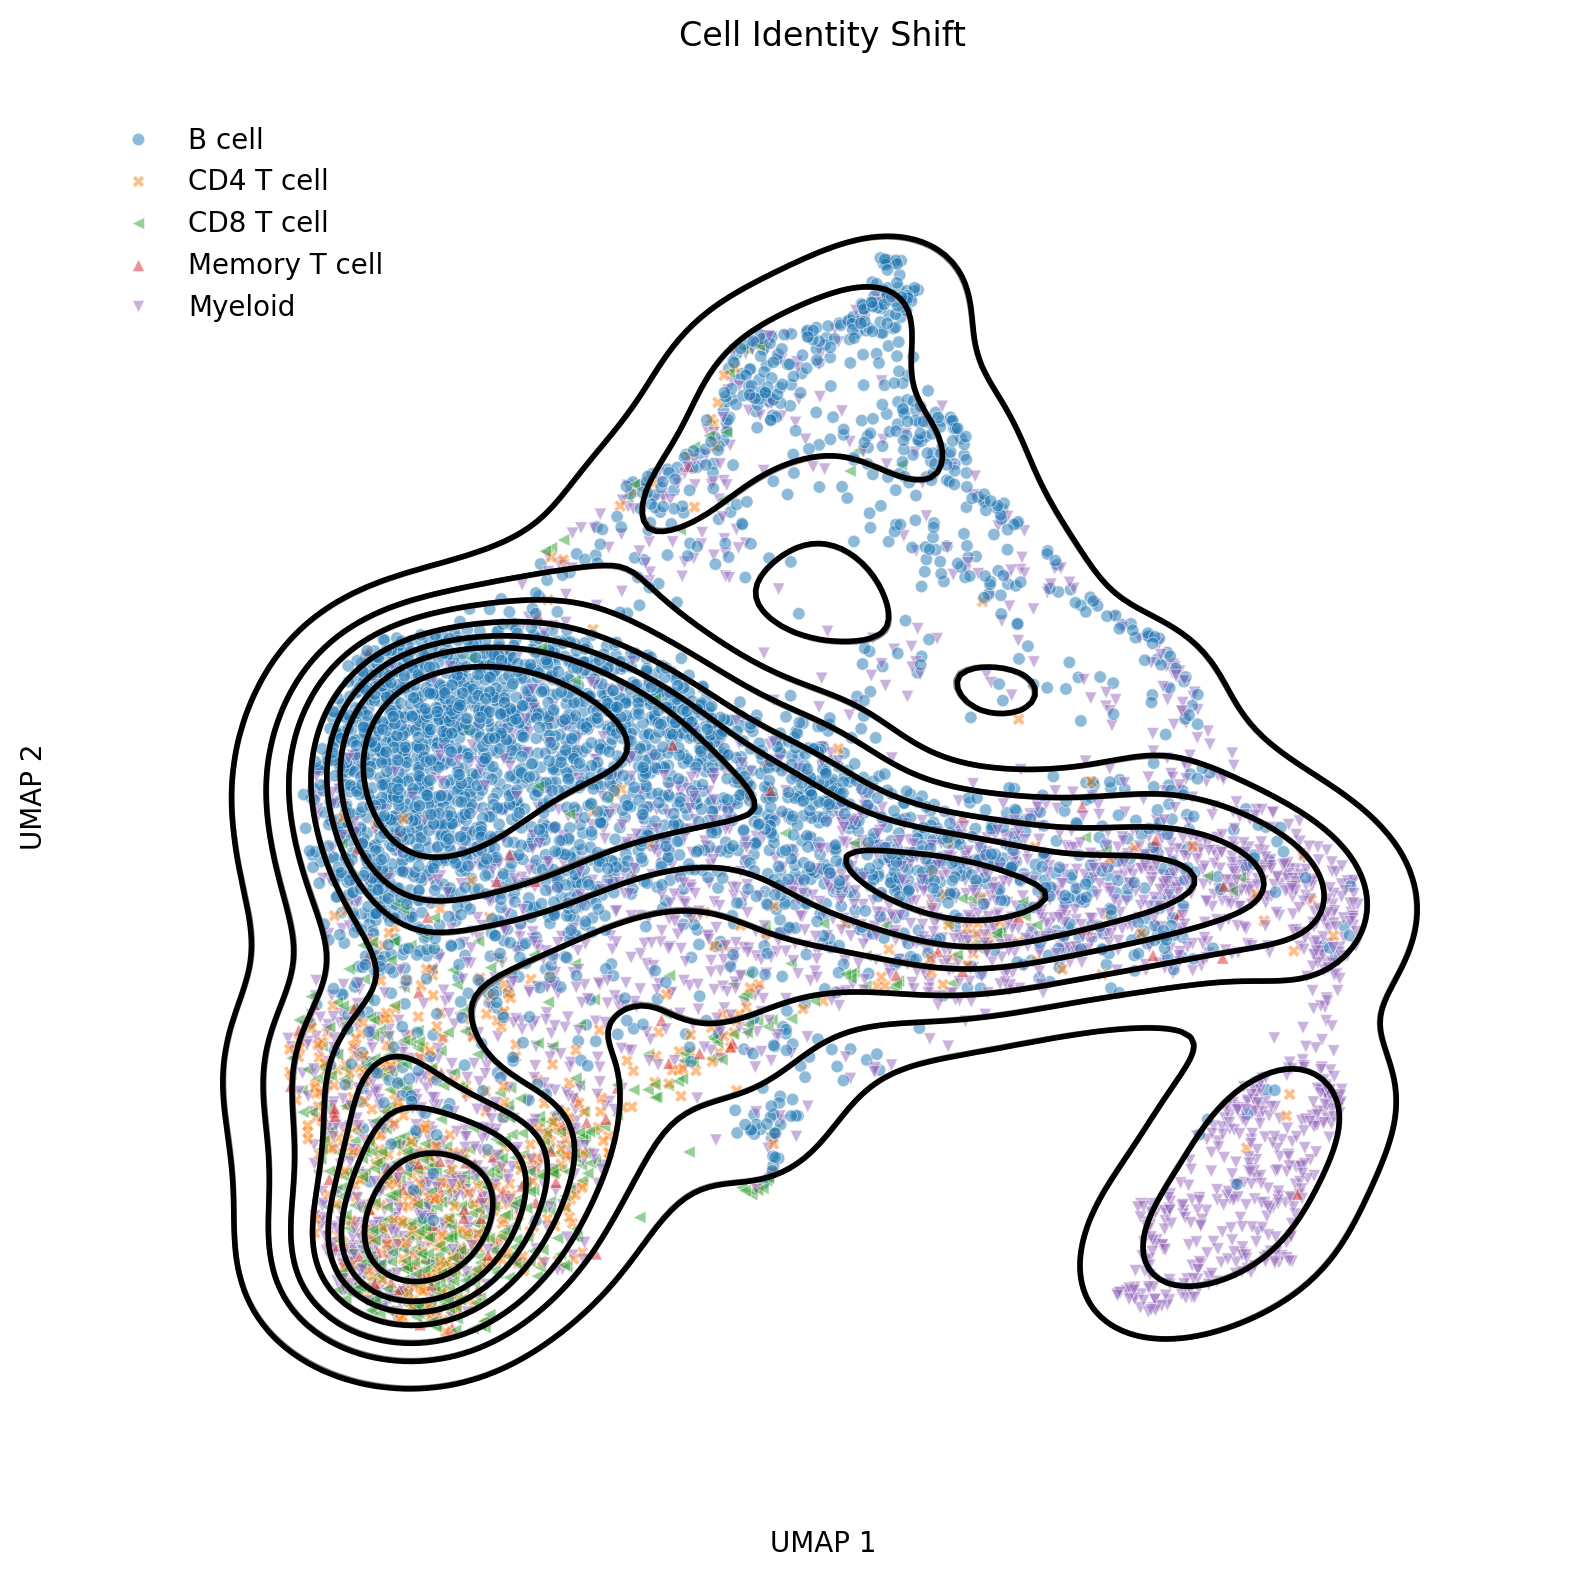

In [ ]:
save_dir = '/ix/djishnu/shared/djishnu_kor11/results/spleen'
pythia.plot_contour_shift(savepath=f'{save_dir}/{goi}_contour_shift.png')

In [ ]:
pythia.plot_betas_goi(save_dir=save_dir)

Ligand interactions: 100%|██████████| 2627/2627 [01:19<00:00, 33.17it/s]

Tnfsf10 is not a modulator of any gene


In [ ]:
pythia.plot_beta_neighborhoods(
    use_modulators=True,
    savepath=f'{save_dir}/{goi}_betas_neighborhoods.png'
)

# pythia.plot_beta_neighborhoods(
#     use_modulators=False,
#     savepath=f'{save_dir}/beta_{goi}_neighborhoods.png'
# )


In [ ]:
pythia.show_cluster_gex(embedding='spatial')
pythia.show_cluster_gex(embedding='FR')

0.007113270049302084


Computing vectors: 100%|██████████| 1400/1400 [00:00<00:00, 14620.52it/s]


0.007113270049302084


Computing vectors: 100%|██████████| 1400/1400 [00:00<00:00, 18261.68it/s]


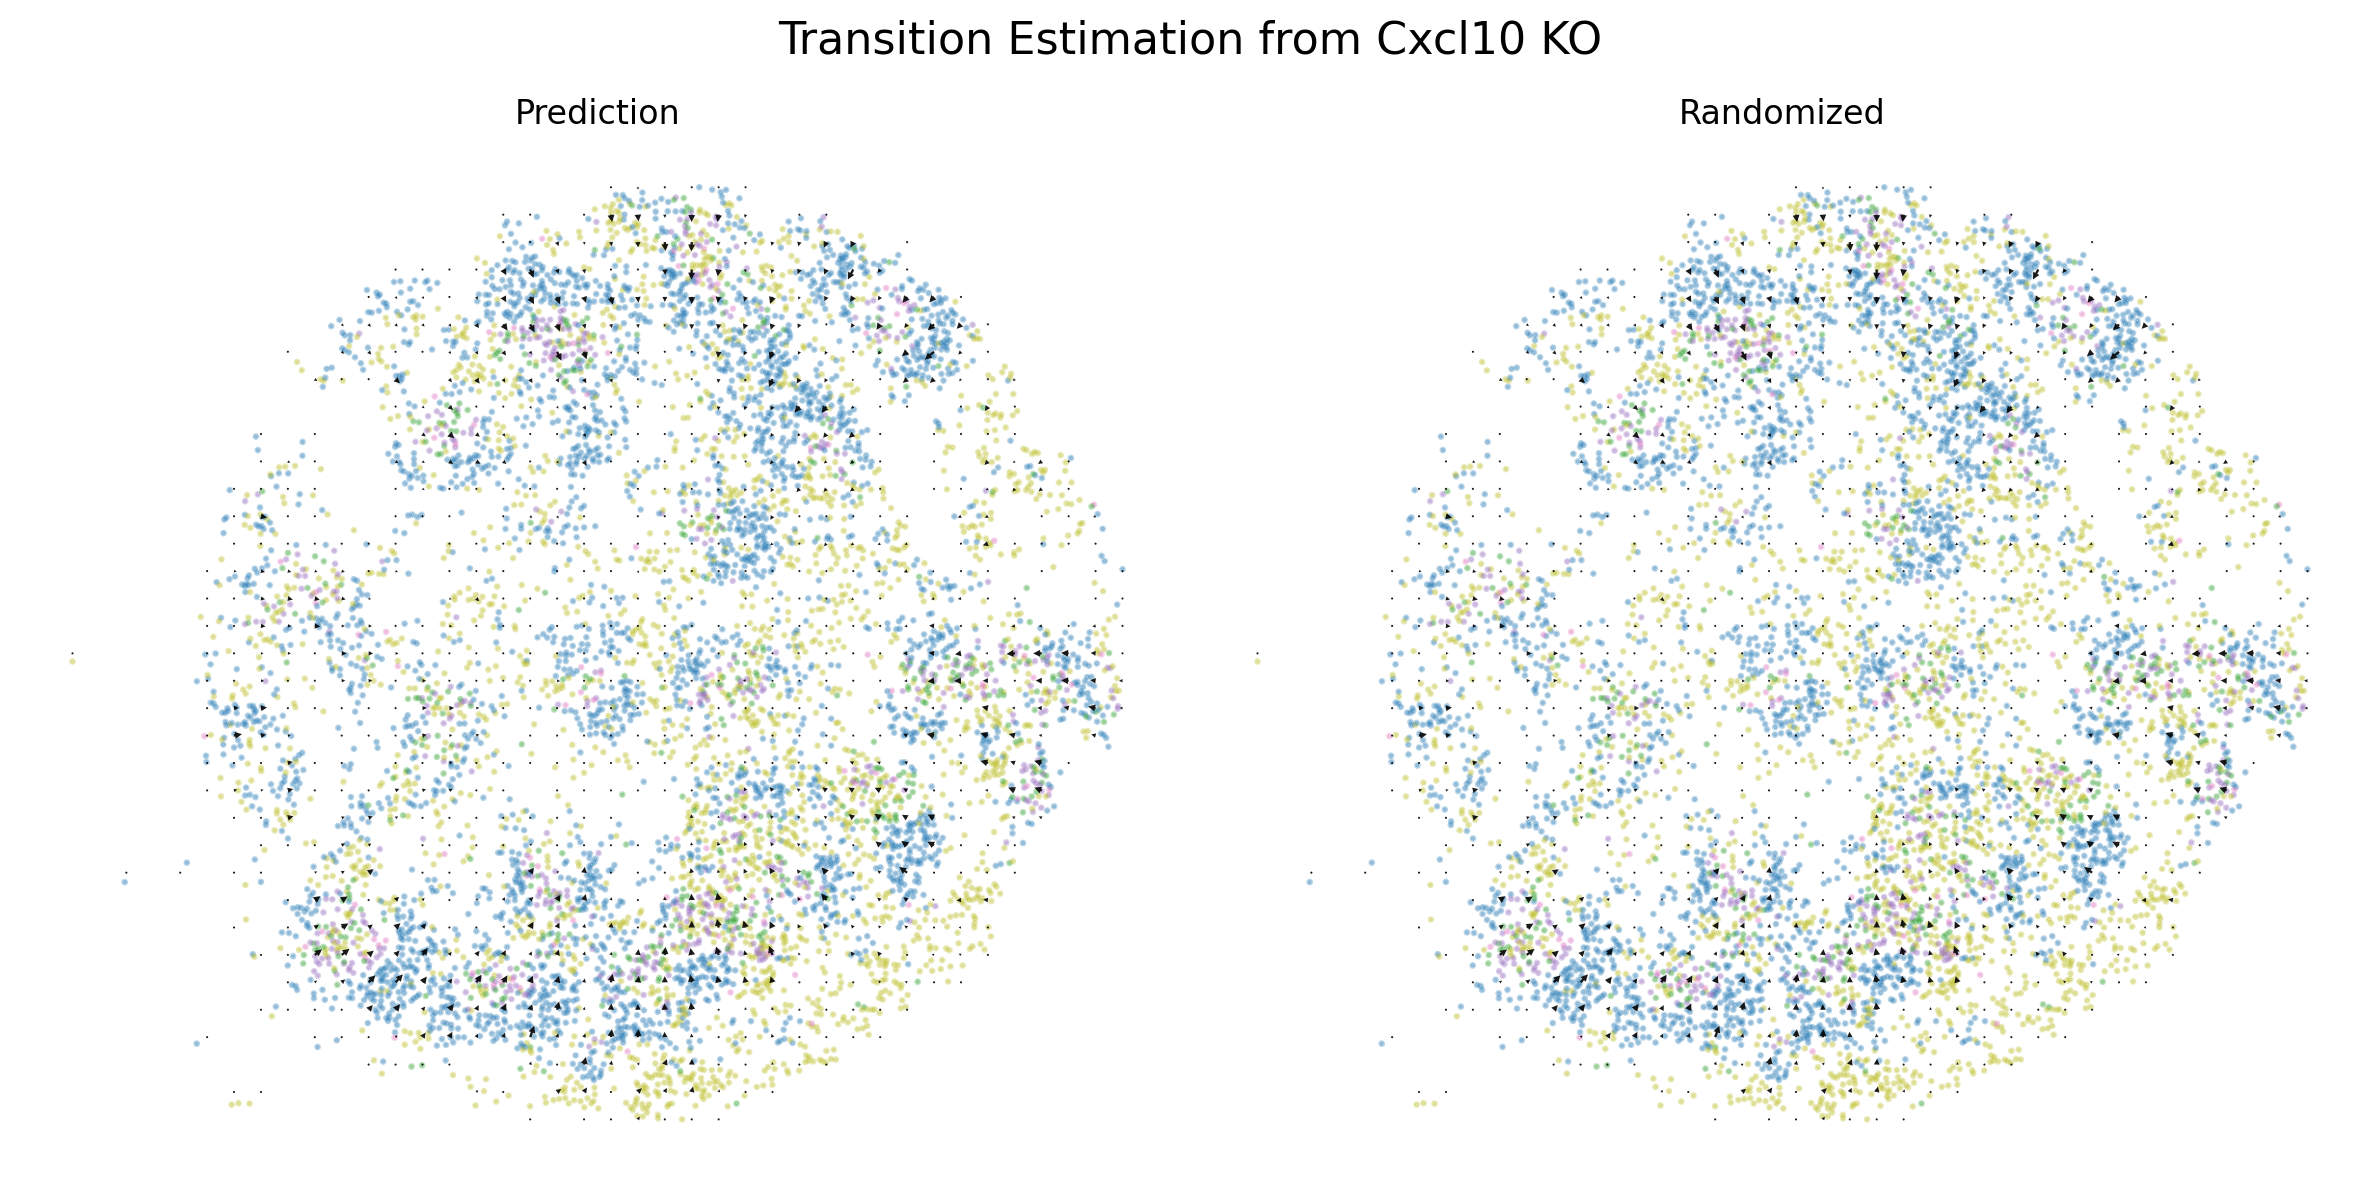

In [ ]:
pythia.show_transitions(vector_scale=60, savepath=f'{save_dir}/{goi}_transitions.png')

In [ ]:
pythia.betas_cache

{'betas_Cxcl10': None}

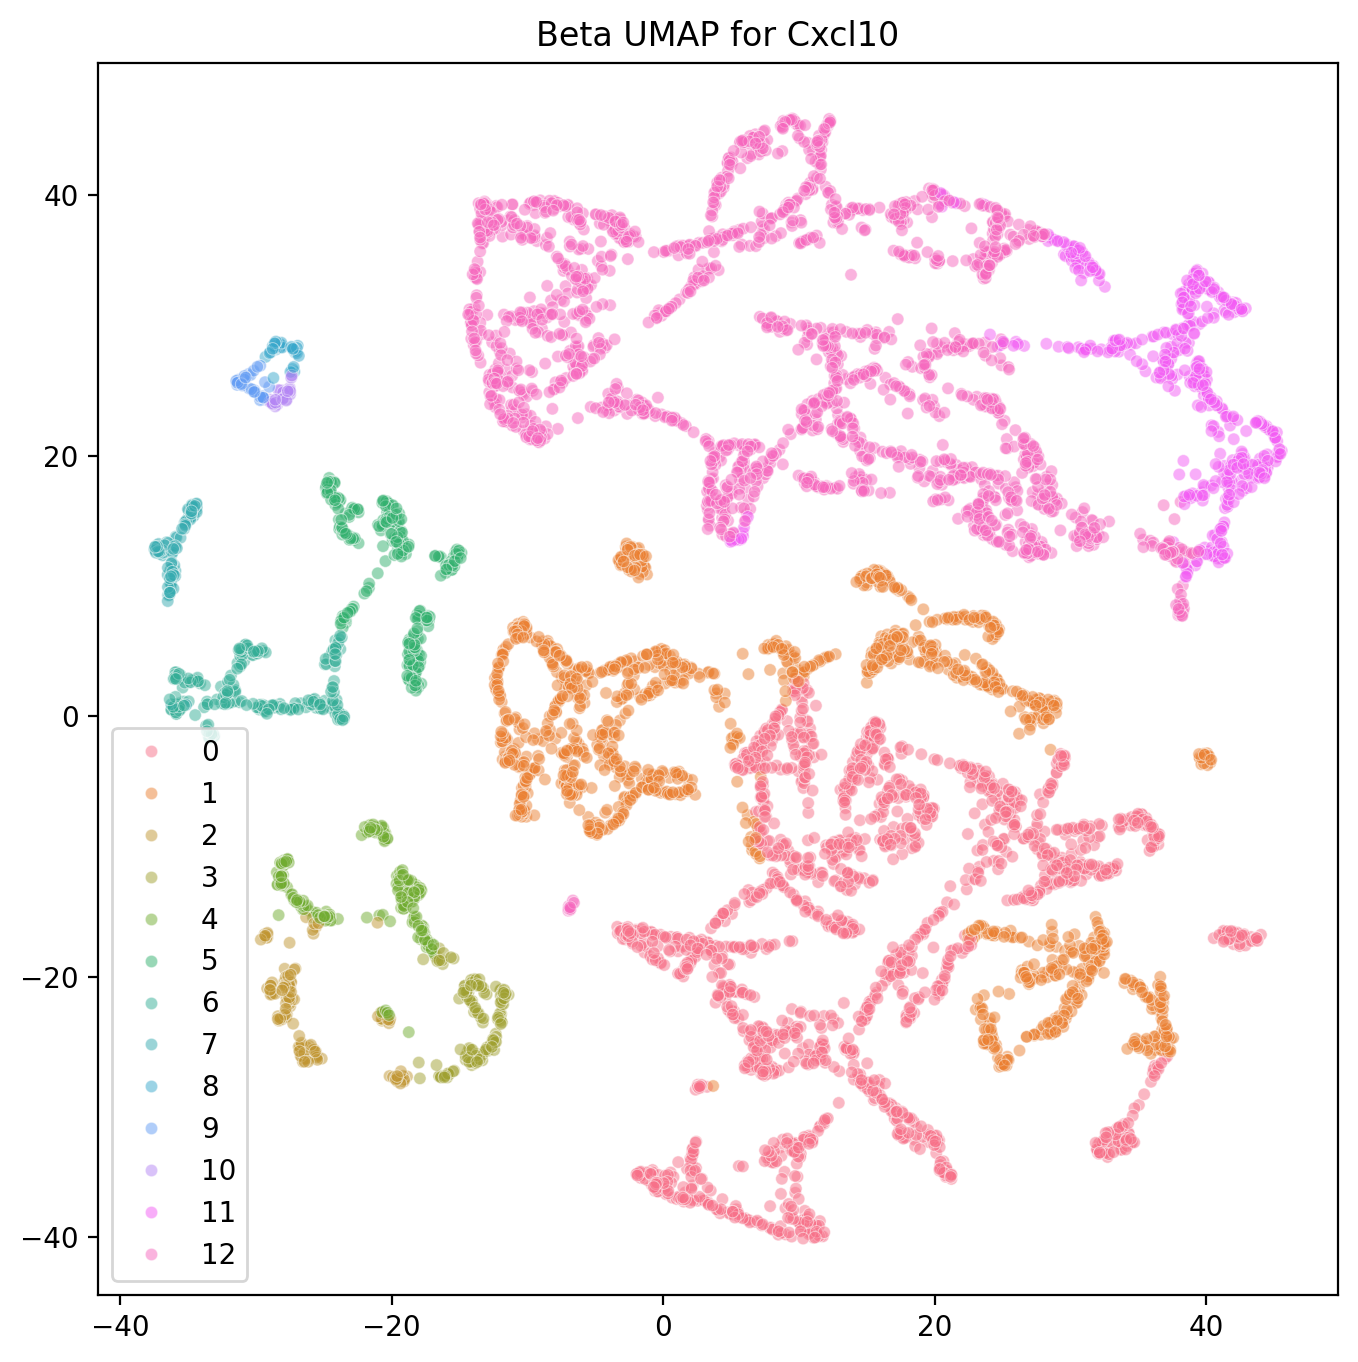

In [ ]:
# Use clusters from betas

# pythia.show_cluster_gex(annot='beta_neighborhood', embedding='FR')
pythia.plot_beta_umap(use_modulators=True)

In [ ]:
pythia.show_transitions(
    layout_embedding=pythia.adata.obsm['beta_umap'],
    nn_embedding=pythia.adata.obsm['beta_umap'],
    grid_scale=2,
    vector_scale=1, 
    annot='beta_neighborhood',
    savepath=f'{save_dir}/{goi}_transitions_neighborhoods.png')

0.014226540098604168


Computing vectors: 100%|██████████| 5600/5600 [00:00<00:00, 20777.57it/s]


0.014226540098604168


Computing vectors: 100%|██████████| 5600/5600 [00:00<00:00, 18930.05it/s]


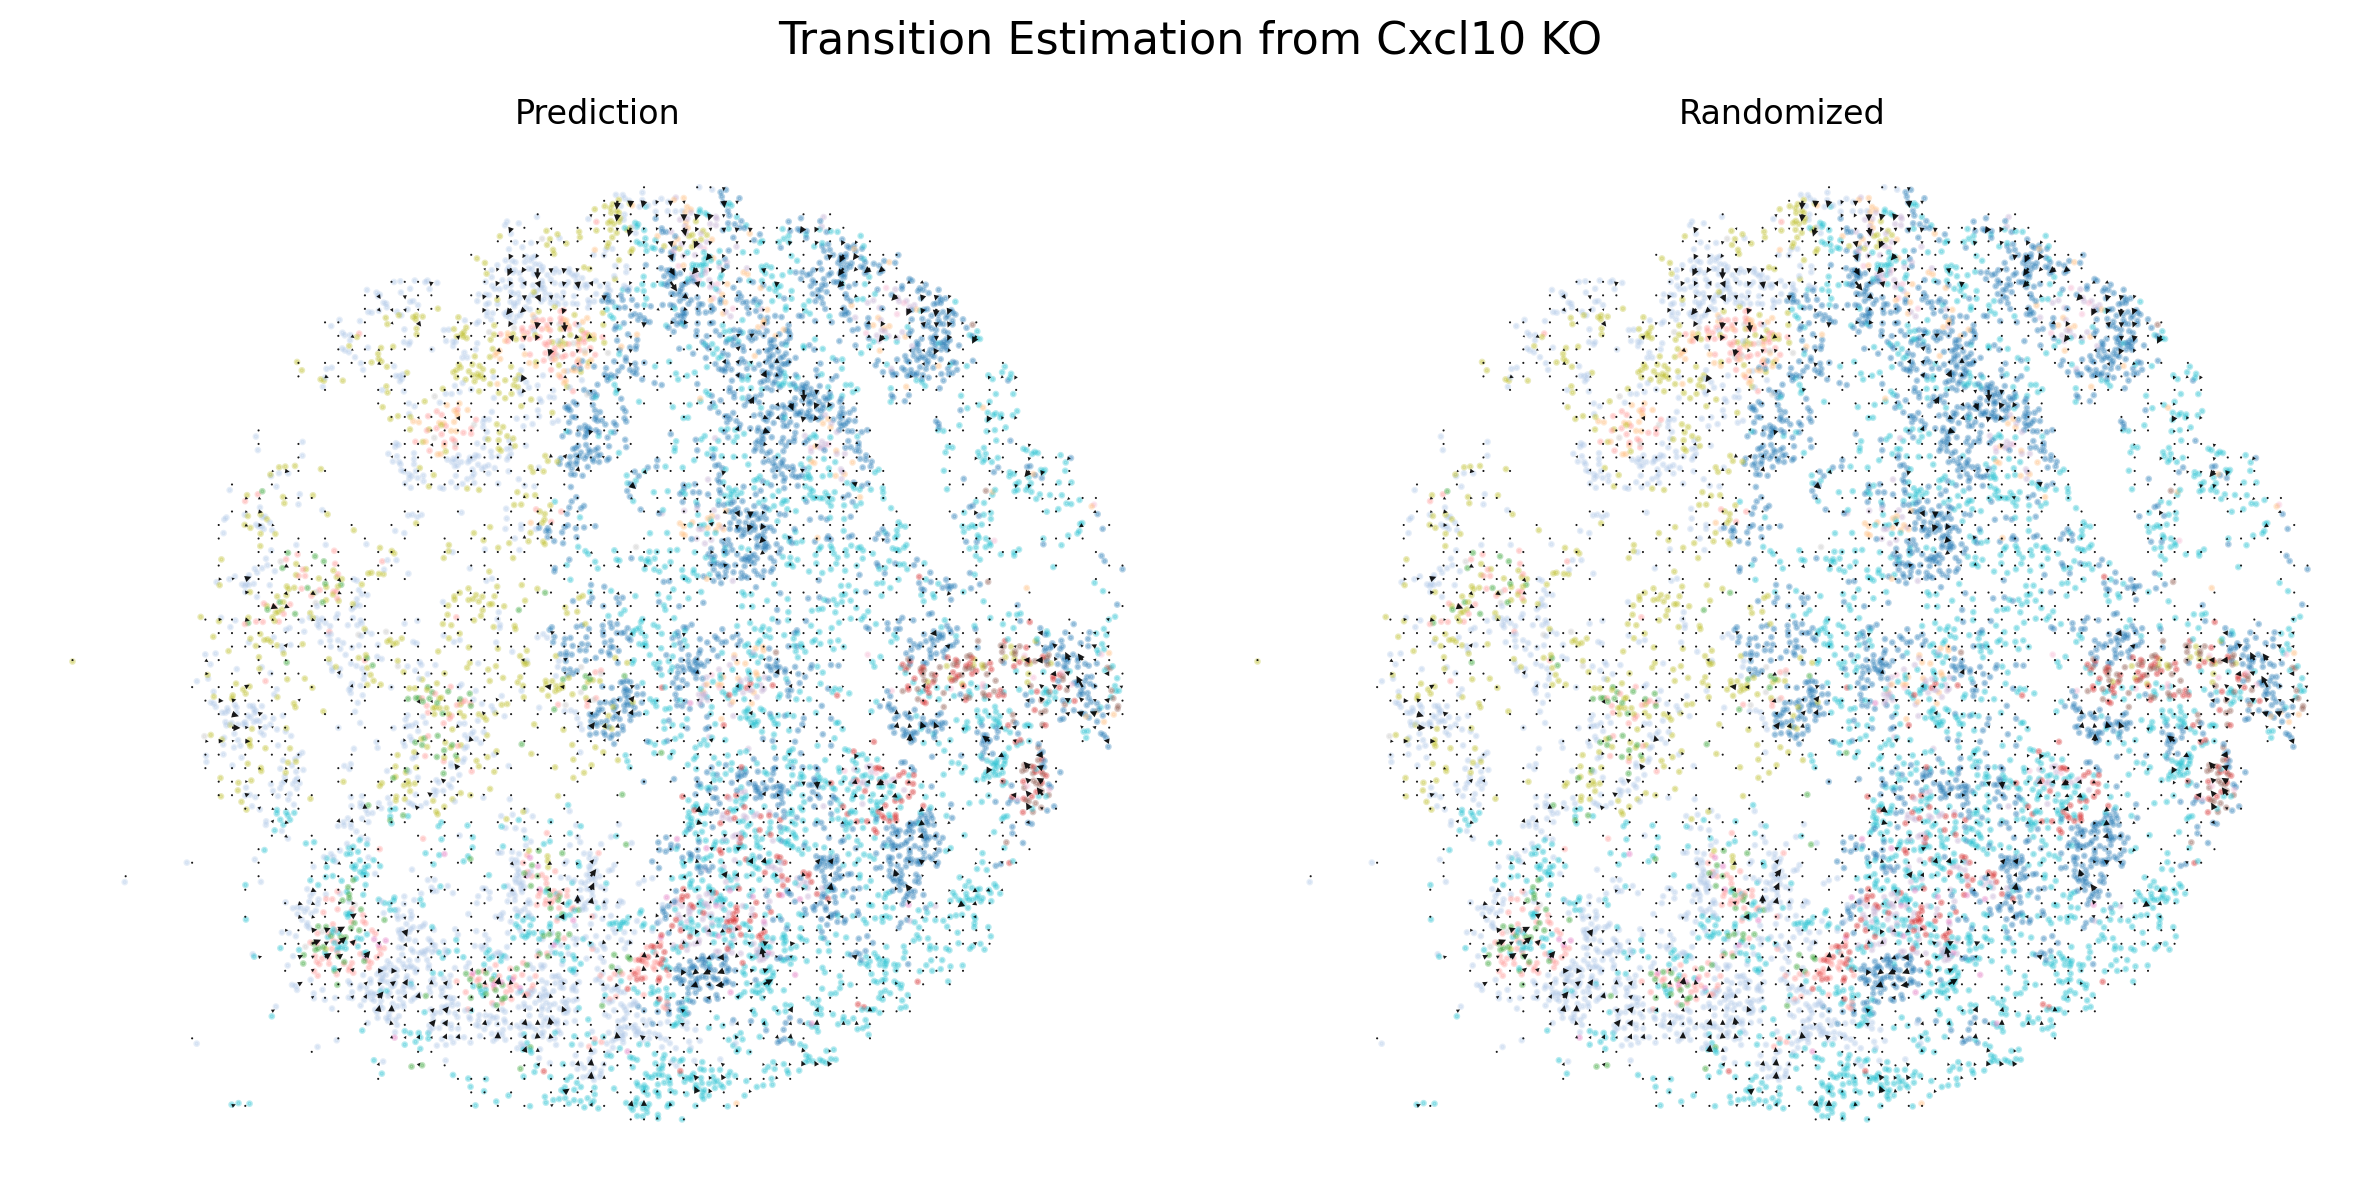

In [ ]:
pythia.show_transitions(
    layout_embedding=pythia.adata.obsm['spatial'],
    nn_embedding=pythia.adata.obsm['beta_umap'],
    grid_scale=2,
    vector_scale=60, 
    annot='beta_neighborhood',
    savepath=f'{save_dir}/{goi}_transitions_neighborhoods.png')